# 02. Neural Network Classification with Tensorflow Exercises


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

tf.__version__

'2.9.1'

## 3. Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and then build a model to fit it at over 85% accuracy.

In [5]:
from sklearn.datasets import make_moons

X, y = make_moons(
    n_samples = 1000,
    noise = 0.05,
    random_state = 42
)

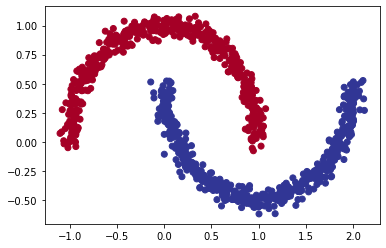

In [7]:
# Visualise the Data

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

We can clearly see that the boundary between the two types of classes should be non-linear. This will need non-linear activation layers.

Let us first make a function that will be able to visualise the boundary created by the model.

In [8]:
def plot_decision_boundary(model, X, y):
    """
    """

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    # Check for multi-class classification
    if len(y_pred[0]) > 1:
        print("Multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [16]:
# 1. Create the model
model_moons = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(8, activation = "relu", input_shape = (2,), name = "input_layer"),
        tf.keras.layers.Dense(8, activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_moons"
)

# 2. Compile the model
model_moons.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ["accuracy", tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

# 3. Fit the model
model_moons.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.6381 - accuracy: 0.5863 - precision_2: 1.0000 - recall_2: 0.1725
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6017 - accuracy: 0.7237 - precision_2: 1.0000 - recall_2: 0.4475
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5662 - accuracy: 0.8112 - precision_2: 0.9844 - recall_2: 0.6325
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5292 - accuracy: 0.8425 - precision_2: 0.9127 - recall_2: 0.7575
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.4891 - accuracy: 0.8662 - precision_2: 0.8766 - recall_2: 0.8525
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.4483 - accuracy: 0.8700 - precision_2: 0.8700 - recall_2: 0.8700
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.4088 - accuracy: 0.8637 - precision_2: 0.8593 - recall_2: 0.8700
Epoch 8/100
25/25 

In [17]:
model_moons.evaluate(X_test, y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.0289 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000


[0.028852371498942375, 1.0, 1.0, 1.0]

Woohoo! We've made it! Lets visualize the decision boundary now.

313/313 [==============================] - 1s 2ms/step
Binary classification


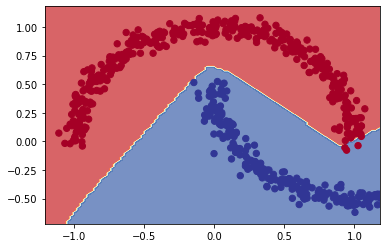

In [18]:
plot_decision_boundary(model_moons, X_train, y_train)

Looks good enough for the job!

## 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [10]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
# Unique classes
un_array, idx = tf.unique(y_train)
un_array.numpy().shape[0]

10

Before training lets normalize the data.

In [12]:
x_max, x_min = X_train.max(), X_train.min()

X_train_norm = (X_train - x_min)/(x_max - x_min)
X_test_norm = (X_test - x_min)/(x_max - x_min)

Now first lets train a model and then create the confusion matrix function.

In [13]:
# 1. Create the model
model_mnist = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28,), name = "flatten_layer"),
        tf.keras.layers.Dense(64, activation = "relu", name = "input_layer"),
        tf.keras.layers.Dense(128, activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(128, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(32, activation = "relu", name = "hidden_layer_3"),
        tf.keras.layers.Dense(un_array.numpy().shape[0], activation = "softmax", name = "output_layer")
    ], name = "model_mnist"
)

# 2. Compile the model
model_mnist.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# 3. Fit the model
model_history = model_mnist.fit(X_train_norm, tf.one_hot(y_train, depth = un_array.numpy().shape[0]), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.5167 - accuracy: 0.8126 - precision: 0.8680 - recall: 0.7594
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3756 - accuracy: 0.8637 - precision: 0.8930 - recall: 0.8357
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3435 - accuracy: 0.8735 - precision: 0.9000 - recall: 0.8500
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3204 - accuracy: 0.8799 - precision: 0.9034 - recall: 0.8589
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3045 - accuracy: 0.8881 - precision: 0.9099 - recall: 0.8687
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2912 - accuracy: 0.8911 - precision: 0.9114 - recall: 0.8731
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2807 - accuracy: 0.8955 - precision: 0.9147 - recall: 0.8778
Epoch 8/10
1875/1875

In [14]:
model_mnist.evaluate(X_test, tf.one_hot(y_test, depth = 10))

313/313 [==============================] - 2s 7ms/step - loss: 60.3442 - accuracy: 0.8453 - precision: 0.8453 - recall: 0.8453


[60.34419250488281, 0.845300018787384, 0.845300018787384, 0.845300018787384]

<AxesSubplot:>

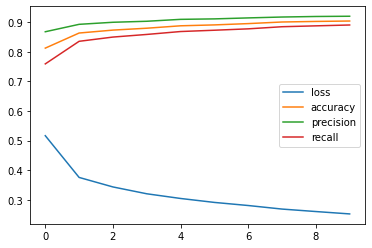

In [15]:
pd.DataFrame(model_history.history).plot()

In [75]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(model, X, y, figsize = (15, 10), classes = None, text_size = 15):
    """
    """
    y_pred = model.predict(X)
    y_pred_labels = tf.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred_labels)
    cm_norm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    n_classes = cm_norm.shape[0]
    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues);
    fig.colorbar(cax);

    if classes:
        labels = classes

    else:
        labels = np.arange(cm.shape[0])

    n_classes = len(labels)

    # Label the axes
    ax.set(title = "confusion_matrix",
           xlabel = "predicted_label",
           ylabel = "true_label",
           xticks = np.arange(n_classes),
           yticks = np.arange(n_classes),
           xticklabels = labels,
           yticklabels = labels
    );

    # Set threshold for different colors
    threshold = (cm.max() + cm.min())/2

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust the label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment = "center",
                color = "white" if cm[i,j] > threshold else "black",
                size = text_size)

In [16]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

1875/1875 [==============================] - 4s 2ms/step


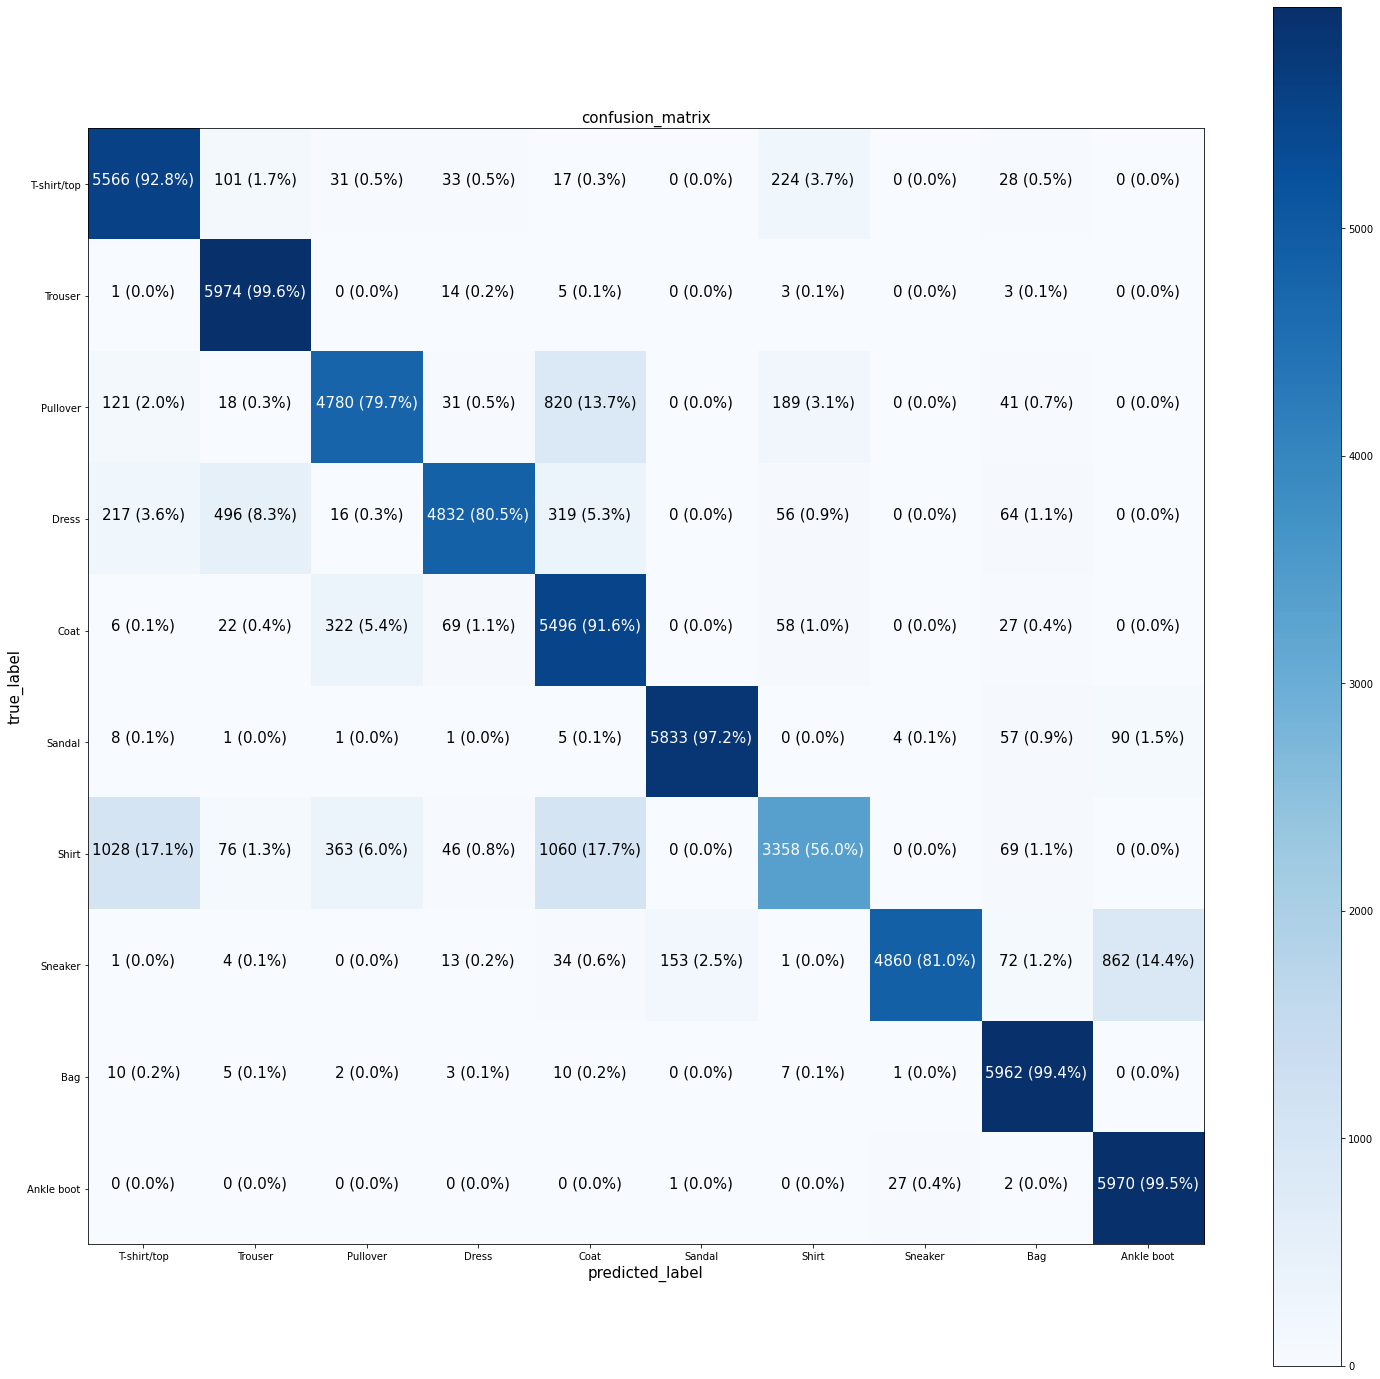

In [77]:
plot_confusion_matrix(model_mnist, X_train, y_train, figsize = (25,25), classes = class_names)

## 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [5]:
A = tf.linspace(-10, 10, 101)

In [7]:
def softmax(A):
    return tf.exp(A)/tf.reduce_sum(tf.exp(A))

y_A_softmax = softmax(A)

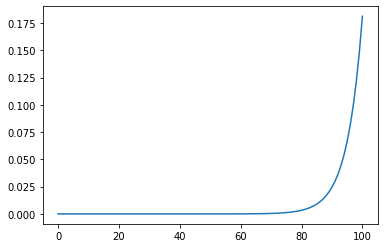

In [9]:
plt.plot(y_A_softmax);

## 6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time.

In [61]:
def visualize_predictions(model, X, y, num_predictions, image_matrix, classes = class_names, figsize = (10,10)):
    """
    Show a few random predictions
    """
    prediction_idx = np.random.randint(low = 0, high = X.shape[0], size = num_predictions)
    prediction_data = X[prediction_idx,...]
    prediction_labels = y[prediction_idx,...]
    y_pred_labels = tf.argmax(model.predict(prediction_data), axis = 1)

    plt.figure(figsize = figsize)
    for plot_idx in range(num_predictions):
        ax = plt.subplot(image_matrix[0], image_matrix[1], plot_idx+1)
        plt.imshow(prediction_data[plot_idx], cmap = plt.cm.binary);
        if class_names[prediction_labels[plot_idx]] == class_names[y_pred_labels[plot_idx]]:
            color = "green"
        else:
            color = "red"
        plt.title(f'True Label: {class_names[prediction_labels[plot_idx]]};\n Predicted Label: {class_names[y_pred_labels[plot_idx]]}', color = color)
        plt.axis(False)

1/1 [==============================] - 0s 24ms/step


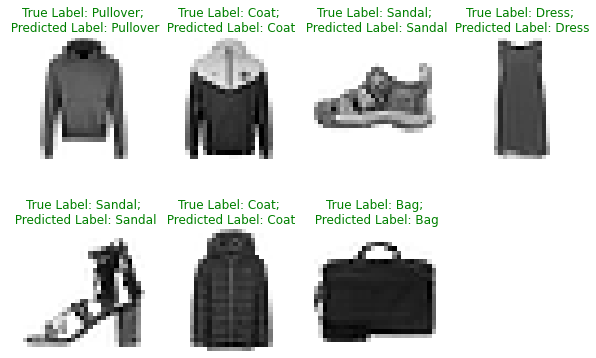

In [66]:
visualize_predictions(model_mnist, X_test_norm, y_test, 7, (3,4), class_names, (10,10))

## 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

In [80]:
def visualize_predictions_by_class(model, X, y, num_predictions, image_matrix, class_to_find, classes = class_names, figsize = (10,10)):
    """
    Show a few random predictions of a class
    """
    class_idx = class_names.index(class_to_find)
    prediction_idx = np.random.choice(np.where(y_test == class_idx)[0], size = num_predictions)
    prediction_data = X[prediction_idx,...]
    prediction_labels = y[prediction_idx,...]
    y_pred_labels = tf.argmax(model.predict(prediction_data), axis = 1)

    plt.figure(figsize = figsize)
    for plot_idx in range(num_predictions):
        ax = plt.subplot(image_matrix[0], image_matrix[1], plot_idx+1)
        plt.imshow(prediction_data[plot_idx], cmap = plt.cm.binary);
        if class_names[prediction_labels[plot_idx]] == class_names[y_pred_labels[plot_idx]]:
            color = "green"
        else:
            color = "red"
        plt.title(f'True Label: {class_names[prediction_labels[plot_idx]]};\n Predicted Label: {class_names[y_pred_labels[plot_idx]]}', color = color)
        plt.axis(False)

1/1 [==============================] - 0s 16ms/step


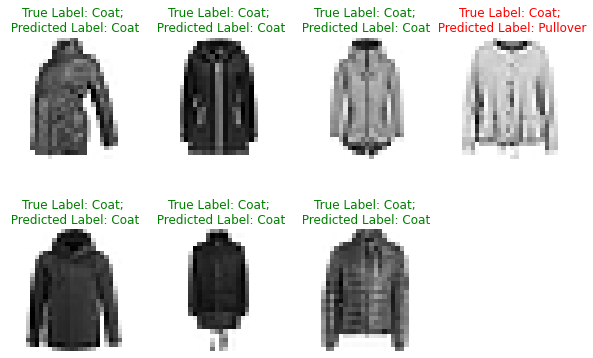

In [81]:
visualize_predictions_by_class(model = model_mnist,
                               X = X_test_norm,
                               y = y_test,
                               num_predictions = 7,
                               image_matrix = (3,4),
                               class_to_find = 'Coat',
                               classes = class_names,
                               figsize = (10,10)
)